# Feature engineering

## pycaret
- https://pycaret.org/preprocessing/

## scikit-learn    
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing 

## scikit-learn categorical encoder
- https://contrib.scikit-learn.org/category_encoders/ 

## A Short Guide for Feature Engineering and Feature Selection
- https://github.com/ashishpatel26/Amazing-Feature-Engineering

## O'Relly book : feature_engineering_for_machine_learning
- https://www.repath.in/gallery/feature_engineering_for_machine_learning.pdf

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams['font.family']='Malgun Gothic'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

## Recursive feature elimination with cross-validation
### target에 영향을 주는 특성변수 selection method
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py

In [3]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=5,
                           n_redundant=2, n_repeated=0, n_classes=8,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1 # Minimum number of features to consider
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)

rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=SVC(kernel='linear'), scoring='accuracy')

In [4]:
print("Optimal number of features : %d" % rfecv.n_features_)
print('Ranking of features : ')
rfecv.ranking_
rfecv.get_support()

Optimal number of features : 5
Ranking of features : 


array([14, 11, 13, 16,  1, 19,  5,  2,  1, 10,  9,  8, 17,  4,  7,  3, 15,
        6, 21,  1, 12,  1, 18, 20,  1])

array([False, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False,  True])

<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of features selected')

Text(0, 0.5, 'Cross validation score (nb of correct classifications)')

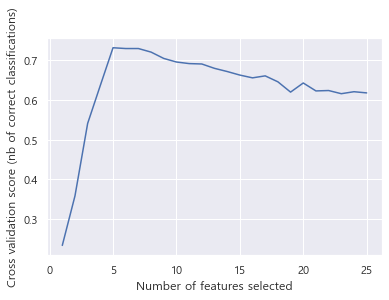

In [5]:
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

## Test with permutations the significance of a classification score
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_permutation_test_for_classification.html#sphx-glr-auto-examples-feature-selection-plot-permutation-test-for-classification-py

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

In [7]:
import numpy as np

n_uncorrelated_features = 100
rng = np.random.RandomState(seed=0)
# Use same number of samples as in iris and 2200 features
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

### Permutation test score
permutation_test_score generates a null distribution by calculating the accuracy of the classifier on 1000 different permutations of the dataset, where features remain the same but labels undergo different permutations. This is the distribution for the null hypothesis which states there is no dependency between the features and labels. An empirical p-value is then calculated as the percentage of permutations for which the score obtained is greater that the score obtained using the original data.

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import permutation_test_score

clf = SVC(kernel='linear', random_state=7)
cv = StratifiedKFold(2, shuffle=True, random_state=0)

In [9]:
score_iris, perm_scores_iris, pvalue_iris = permutation_test_score(clf, X, y, 
                                                                   scoring="accuracy", cv=cv, n_permutations=1000)

score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(clf, X_rand, y, 
                                                                   scoring="accuracy", cv=cv, n_permutations=1000)

(array([ 0.16666667,  0.41666667,  1.        ,  1.25      ,  1.        ,
         3.        ,  5.        ,  8.08333333,  9.08333333,  5.25      ,
        10.        , 11.66666667, 10.91666667,  7.83333333,  2.08333333,
         2.75      ,  1.91666667,  1.16666667,  0.58333333,  0.16666667]),
 array([0.22666667, 0.23866667, 0.25066667, 0.26266667, 0.27466667,
        0.28666667, 0.29866667, 0.31066667, 0.32266667, 0.33466667,
        0.34666667, 0.35866667, 0.37066667, 0.38266667, 0.39466667,
        0.40666667, 0.41866667, 0.43066667, 0.44266667, 0.45466667,
        0.46666667]),
 <BarContainer object of 20 artists>)

Text(0.7, 260, 'Score on original\ndata: 0.97\n(p-value: 0.001)')

Text(0.5, 0, 'Accuracy score')

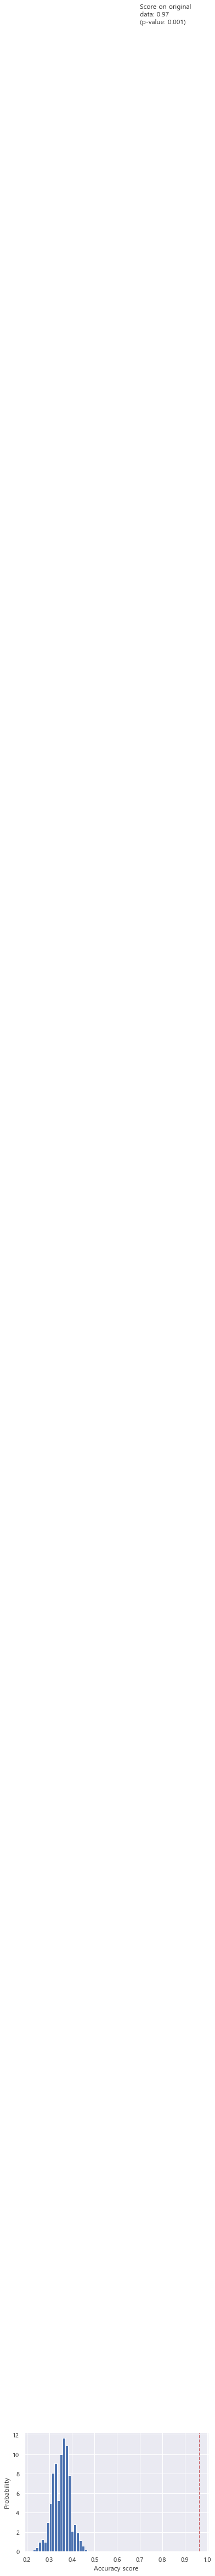

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(perm_scores_iris, bins=20, density=True)
ax.axvline(score_iris, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_iris:.2f}\n"
               f"(p-value: {pvalue_iris:.3f})")
ax.text(0.7, 260, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability")

(array([ 0.13043478,  0.06521739,  0.45652174,  0.58695652,  2.2826087 ,
         2.73913043,  6.84782609,  6.26086957,  7.5       ,  8.02173913,
        10.5       ,  5.47826087,  5.2173913 ,  5.08695652,  1.76086957,
         1.36956522,  0.65217391,  0.06521739,  0.13043478,  0.06521739]),
 array([0.18666667, 0.202     , 0.21733333, 0.23266667, 0.248     ,
        0.26333333, 0.27866667, 0.294     , 0.30933333, 0.32466667,
        0.34      , 0.35533333, 0.37066667, 0.386     , 0.40133333,
        0.41666667, 0.432     , 0.44733333, 0.46266667, 0.478     ,
        0.49333333]),
 <BarContainer object of 20 artists>)

(0.13, 0.5086666666666666)

Text(0.14, 125, 'Score on original\ndata: 0.39\n(p-value: 0.119)')

Text(0.5, 0, 'Accuracy score')

Text(0, 0.5, 'Probability')

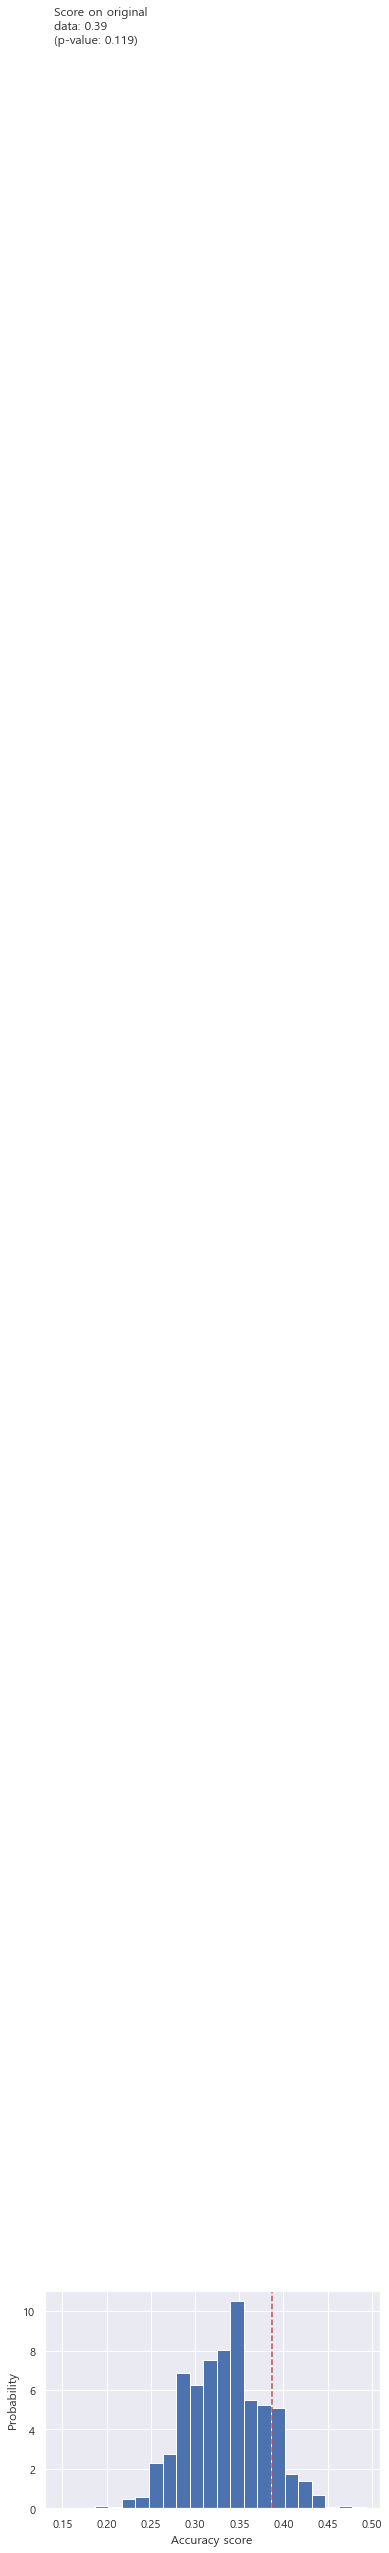

In [11]:
fig, ax = plt.subplots()

ax.hist(perm_scores_rand, bins=20, density=True)
ax.set_xlim(0.13)
ax.axvline(score_rand, ls='--', color='r')
score_label = (f"Score on original\ndata: {score_rand:.2f}\n"
               f"(p-value: {pvalue_rand:.3f})")
ax.text(0.14, 125, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability")
plt.show()

## 1. 데이터 읽기
### kaggle('../data/creditcard.csv'')로 search
https://www.kaggle.com/mlg-ulb/creditcardfraud

In [12]:
df = pd.read_csv("../data/creditcard.csv")
df.head()
df.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


(284807, 31)

In [13]:
df = df.sample(frac=0.1)

In [14]:
summary(df)

,데이터형태(dtypes),비 결측치 수(notnull,결측치 수(null),고유값 수(nunique)
Time,float64,28481,0,25682
V1,float64,28481,0,28265
V2,float64,28481,0,28265
V3,float64,28481,0,28265
V4,float64,28481,0,28265
V5,float64,28481,0,28265
V6,float64,28481,0,28265
V7,float64,28481,0,28265
V8,float64,28481,0,28265
V9,float64,28481,0,28265


## 특성추출 및 선택

## Feature selection
### 가. Removing features with low variance

In [15]:
from sklearn.feature_selection import VarianceThreshold
X = [[0, 2, 0, 3], [0, 1, 4, 3], [0, 1, 1, 3]]
pd.DataFrame(X)
selector = VarianceThreshold()
selector.fit_transform(X)

,0,1,2,3
0,0,2,0,3
1,0,1,4,3
2,0,1,1,3


array([[2, 0],
       [1, 4],
       [1, 1]])

이항분포(베르누이)를 갖는 변수에서 '1', '0'이 전체의 80% 이상인 변수를 제거할 때, 이항분포의분산은 p*(1-p)
첫번쨰와 마지막 컬럼은 p = 5/6 > 0.8 만큼 '1' 혹은 '0'을 포함하고 있어 제거함 

In [16]:
X = [[0, 0, 1, 1, 0], [0, 1, 0, 1, 0], [1, 0, 0, 0, 0], [0, 1, 1, 1, 0], [0, 1, 0, 1, 0], [0, 1, 1, 1, 0]]
X
sel = VarianceThreshold(threshold=(.8 * (1 - .8))) # 
sel.fit_transform(X)

[[0, 0, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 1, 1, 0],
 [0, 1, 0, 1, 0],
 [0, 1, 1, 1, 0]]

array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

## 자료

In [17]:
X = df.drop(['Class'], axis=1)
y = df['Class']
feature_name = X.columns
best_features = 15
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
229927,146114.0,-0.842803,0.595219,-0.125445,-0.941590,1.358630,0.882539,0.609168,0.239173,-0.016170,...,-0.310684,-0.129166,-0.114557,0.348975,-1.419904,-0.676093,0.202410,-0.208810,0.097344,2.58
66028,51849.0,-0.361726,-0.320723,1.786311,1.447769,-0.573661,1.666825,-0.183618,0.623078,0.551506,...,0.242947,0.300889,1.049674,0.535531,-0.260392,-1.224908,-0.416000,0.271625,0.193458,150.00
68953,53204.0,1.274022,-0.063409,0.219503,-0.076364,-0.444879,-0.587274,-0.200619,-0.026596,0.085082,...,-0.090790,0.083835,0.230784,-0.116293,0.080580,0.397994,1.119876,-0.089549,-0.013761,2.92
194804,130765.0,-0.074179,1.323029,0.034099,3.028391,1.525925,0.001941,1.184786,-0.082464,-1.981853,...,-0.243241,0.133552,0.376093,-0.046484,-0.360747,-0.401247,-0.043541,-0.051509,0.092997,1.52
261268,159939.0,2.041486,-0.099786,-3.178874,-0.609093,2.692757,3.008549,-0.380572,0.724798,0.439888,...,-0.127125,0.193805,0.611538,0.018124,0.636896,0.288918,-0.080640,0.016379,-0.037549,4.77


In [18]:
sel = VarianceThreshold(threshold = 0.7)
sel.fit(X)
var_support = sel.get_support()
var_support
np.sum(var_support*1)

VarianceThreshold(threshold=0.7)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True])

18

In [19]:
var_features = X.loc[:, var_support].columns
var_features

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'Amount'],
      dtype='object')

In [20]:
pd.DataFrame(sel.fit_transform(X), columns = var_features).head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Amount
0,146114.0,-0.842803,0.595219,-0.125445,-0.941590,1.358630,0.882539,0.609168,0.239173,-0.016170,0.073794,1.215789,1.076532,0.158917,0.175206,-0.222369,-0.764796,2.58
1,51849.0,-0.361726,-0.320723,1.786311,1.447769,-0.573661,1.666825,-0.183618,0.623078,0.551506,-0.370459,0.868662,1.510681,0.303717,-0.631145,-1.158189,-1.001096,150.00
2,53204.0,1.274022,-0.063409,0.219503,-0.076364,-0.444879,-0.587274,-0.200619,-0.026596,0.085082,0.068227,0.992743,0.398444,-0.547425,0.497120,0.437149,0.562919,2.92
3,130765.0,-0.074179,1.323029,0.034099,3.028391,1.525925,0.001941,1.184786,-0.082464,-1.981853,1.274046,-0.093071,-0.028676,-0.395481,0.500568,-2.241598,0.424191,1.52
4,159939.0,2.041486,-0.099786,-3.178874,-0.609093,2.692757,3.008549,-0.380572,0.724798,0.439888,-0.455387,0.410710,0.060519,-0.194950,-0.524890,1.321344,0.132392,4.77


### 독립변수(연속형) : 입력변수(연속형) ---> 상관관계
### 독립변수(연속형) : 입력변수(범주형) ---> LDA, Logistic
### 독립변수(범주형) : 입력변수(연속형) ---> ANOVA
### 독립변수(범주형) : 입력변수(범주형) ---> Chi-Squared

- https://scikit-learn.org/stable/modules/feature_selection.html

- ANOVA https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_classif.html

### 나. 상관계수 (Pearson correlation)

In [21]:
def corr_selector(X, y):

    cor_list = []
    for i in X.columns:
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    cor_feat = X.iloc[:, np.argsort(np.abs(cor_list))[best_features*-1:]].columns.tolist()
    cor_support = [True if i in cor_feat else False for i in feature_name]

    return cor_feat, cor_support

In [22]:
corr_feature, corr_support = corr_selector(X, y)
'/'.join(corr_feature)
''.join(str(corr_support))

'V6/V2/V9/V18/V1/V5/V11/V4/V16/V7/V3/V10/V12/V14/V17'

'[False, True, True, True, True, True, True, True, False, True, True, True, True, False, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False]'

### 다. 카이제곱

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

In [24]:
best_features

15

In [25]:
def Chi_selector(X, y):
    chi_selector = SelectKBest(chi2, k=best_features)
    X_norm = MinMaxScaler().fit_transform(X)
    chi_selector.fit(X_norm, y)
    chi_support = chi_selector.get_support()
    chi_feature = X.loc[:, chi_support].columns.tolist()
    
    return chi_feature, chi_support

chi_feature, chi_support = Chi_selector(X, y)
','.join(chi_feature)
''.join(str(chi_support))

'Time,V1,V3,V4,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,Amount'

'[ True  True False  True  True False False  True False  True  True  True\n  True False  True False  True  True  True  True False False False False\n False False False False False  True]'

### 라. RFE(recursive feature elimination)

In [26]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [27]:
def Wrapper_RFE(X, y):
    rfe_selector = RFE(estimator=LogisticRegression(),
                        n_features_to_select=best_features, step=20)
    X_norm = MinMaxScaler().fit_transform(X)
    rfe_selector.fit(X_norm, y)
    rfe_support = rfe_selector.get_support()
    rfe_feature = X.loc[:,rfe_support].columns.tolist()
    
    return rfe_support, rfe_feature

rfe_support, rfe_feature = Wrapper_RFE(X, y)
','.join(rfe_feature)
''.join(str(rfe_support))

'V1,V2,V3,V4,V9,V10,V11,V12,V13,V14,V15,V16,V17,V19,V24'

'[False  True  True  True  True False False False False  True  True  True\n  True  True  True  True  True  True False  True False False False False\n  True False False False False False]'

### 마. SelectFromModel

In [28]:
from sklearn.feature_selection import SelectFromModel

In [29]:
def logistic_regression(X, y):
    embeded_lr2_selector = SelectFromModel(LogisticRegression(), # default l2
                                           threshold='median') 
    X_norm = MinMaxScaler().fit_transform(X)
    embeded_lr2_selector.fit(X_norm, y)
    embeded_lr2_support = embeded_lr2_selector.get_support()
    embeded_lr2_feature = X.loc[:,embeded_lr2_support].columns.tolist()
    
    return embeded_lr2_support, embeded_lr2_feature

embeded_lr2_support, embeded_lr2_feature = logistic_regression(X, y)
','.join(embeded_lr2_feature)
len(embeded_lr2_feature)

'V1,V2,V3,V4,V9,V10,V11,V12,V13,V14,V15,V16,V17,V19,V24'

15

In [30]:
from sklearn.ensemble import RandomForestClassifier
def random_forest(X, y):
    embeded_rf_selector = SelectFromModel(RandomForestClassifier(), 
                                          threshold='median')
    embeded_rf_selector.fit(X, y)    
    embeded_rf_support = embeded_rf_selector.get_support()
    embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
    return embeded_rf_support, embeded_rf_feature

embeded_rf_support, embeded_rf_feature = random_forest(X, y)
'/'.join(embeded_rf_feature)

'V1/V3/V4/V7/V9/V10/V11/V12/V14/V16/V17/V18/V19/V26/Amount'

RandomForestClassifier()

<Figure size 1800x432 with 0 Axes>

Text(0, 0.5, 'Features Importance')

([<matplotlib.axis.XTick at 0x1bb00122370>,
 [Text(0, 0, 'Time'),
  Text(1, 0, 'V1'),
  Text(2, 0, 'V2'),
  Text(3, 0, 'V3'),
  Text(4, 0, 'V4'),
  Text(5, 0, 'V5'),
  Text(6, 0, 'V6'),
  Text(7, 0, 'V7'),
  Text(8, 0, 'V8'),
  Text(9, 0, 'V9'),
  Text(10, 0, 'V10'),
  Text(11, 0, 'V11'),
  Text(12, 0, 'V12'),
  Text(13, 0, 'V13'),
  Text(14, 0, 'V14'),
  Text(15, 0, 'V15'),
  Text(16, 0, 'V16'),
  Text(17, 0, 'V17'),
  Text(18, 0, 'V18'),
  Text(19, 0, 'V19'),
  Text(20, 0, 'V20'),
  Text(21, 0, 'V21'),
  Text(22, 0, 'V22'),
  Text(23, 0, 'V23'),
  Text(24, 0, 'V24'),
  Text(25, 0, 'V25'),
  Text(26, 0, 'V26'),
  Text(27, 0, 'V27'),
  Text(28, 0, 'V28'),
  Text(29, 0, 'Amount')])

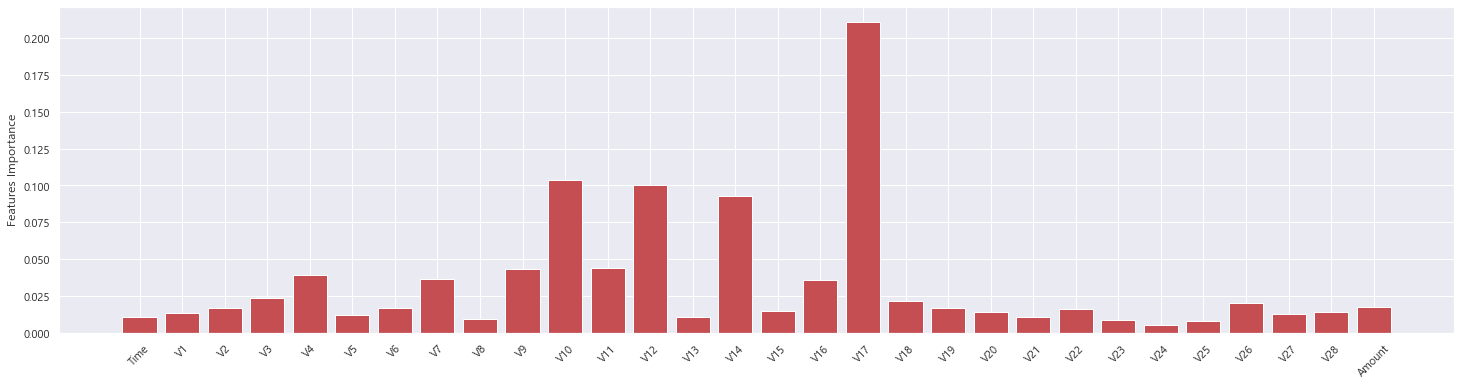

In [31]:
forest = RandomForestClassifier()
forest.fit(X, y)
plt.figure(figsize=(25,6)); plt.ylabel('Features Importance')
plt.xticks(np.arange(X.shape[1]), X.columns, rotation='45')
ax = plt.bar(range(X.shape[1]), forest.feature_importances_, color='r')

### 종합 평점

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

Text(0.5, 0, '노랑은 True, 빨강은 False')

([], [])

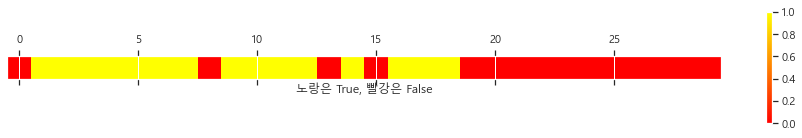

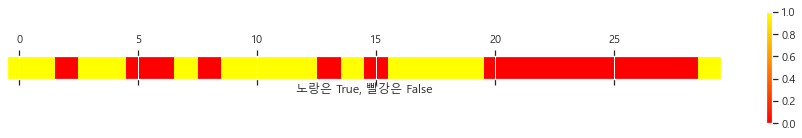

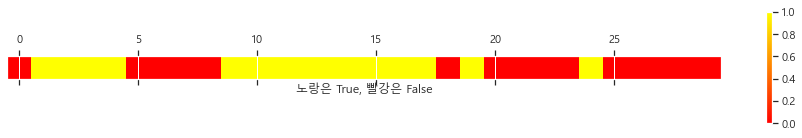

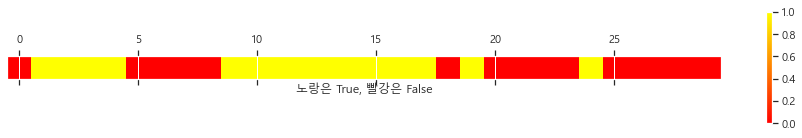

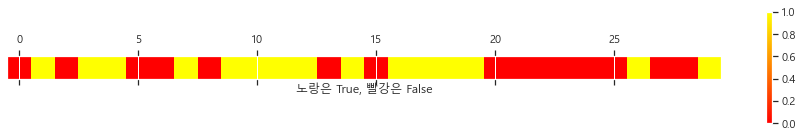

In [32]:
supports= [corr_support, chi_support, rfe_support, 
           embeded_lr2_support, embeded_rf_support]
for sp in supports :
    plt.matshow(np.array(sp).reshape(1, -1), cmap='autumn')
    plt.xlabel('노랑은 True, 빨강은 False')
    plt.yticks(());plt.colorbar()

In [33]:
feature_list = pd.DataFrame({'변수명':feature_name, 'Pearson':corr_support, 
                             'Chi-2':chi_support, 'RFE':rfe_support, 
                             'Logit_L2':embeded_lr2_support, 
                             'RF':embeded_rf_support
                            })
feature_list['총점'] = np.sum(feature_list, axis=1)
feature_list = feature_list.sort_values(['총점'] , ascending=False)
feature_list

,변수명,Pearson,Chi-2,RFE,Logit_L2,RF,총점
16,V16,True,True,True,True,True,5
3,V3,True,True,True,True,True,5
4,V4,True,True,True,True,True,5
9,V9,True,True,True,True,True,5
10,V10,True,True,True,True,True,5
11,V11,True,True,True,True,True,5
12,V12,True,True,True,True,True,5
17,V17,True,True,True,True,True,5
14,V14,True,True,True,True,True,5
1,V1,True,True,True,True,True,5


In [34]:
'''
feature_list.to_excel('../output/feature.xlsx')
data01 = pd.read_excel('../output/feature.xlsx', index_col=0)
data01.head(2)

feature_list.to_pickle('../output/feature.pkl')
data02 = pd.read_pickle('../output/feature.pkl')
data02.head(2)
'''

"\nfeature_list.to_excel('../output/feature.xlsx')\ndata01 = pd.read_excel('../output/feature.xlsx', index_col=0)\ndata01.head(2)\n\nfeature_list.to_pickle('../output/feature.pkl')\ndata02 = pd.read_pickle('../output/feature.pkl')\ndata02.head(2)\n"

<AxesSubplot:xlabel='변수명'>

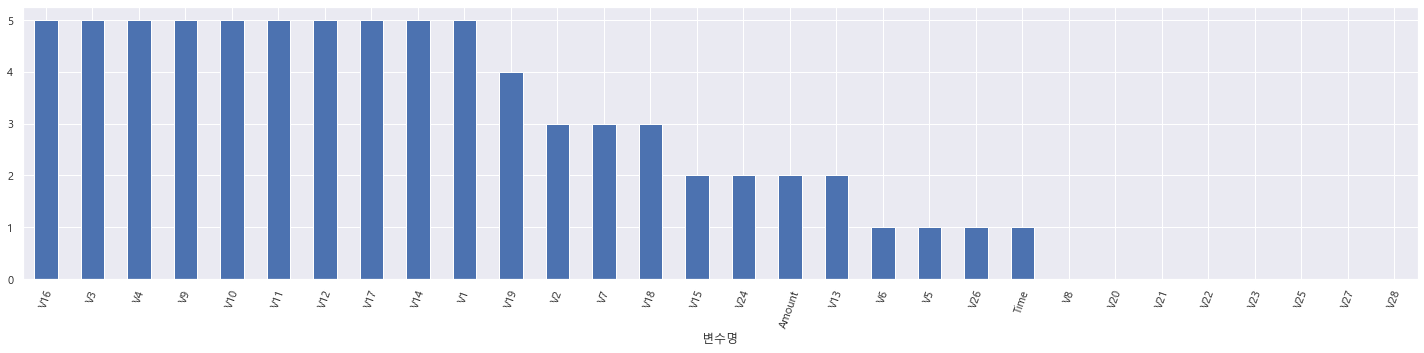

In [35]:
feature = feature_list.set_index('변수명')
pd.DataFrame(feature).총점.plot(kind='bar', rot = '70', figsize = (25, 5))

In [36]:
feature.shape
feature_select = feature[feature['총점'] >= 3]
feature_select.shape
feature_select.index

(30, 6)

(14, 6)

Index(['V16', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V17', 'V14', 'V1', 'V19',
       'V2', 'V7', 'V18'],
      dtype='object', name='변수명')

In [37]:
print('nan, inf & -inf 의 개수는 ?  ', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())

nan, inf & -inf 의 개수는 ?   0


<AxesSubplot:>

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'V16'),
  Text(1.5, 0, 'V3'),
  Text(2.5, 0, 'V4'),
  Text(3.5, 0, 'V9'),
  Text(4.5, 0, 'V10'),
  Text(5.5, 0, 'V11'),
  Text(6.5, 0, 'V12'),
  Text(7.5, 0, 'V17'),
  Text(8.5, 0, 'V14'),
  Text(9.5, 0, 'V1'),
  Text(10.5, 0, 'V19'),
  Text(11.5, 0, 'V2'),
  Text(12.5, 0, 'V7'),
  Text(13.5, 0, 'V18')])

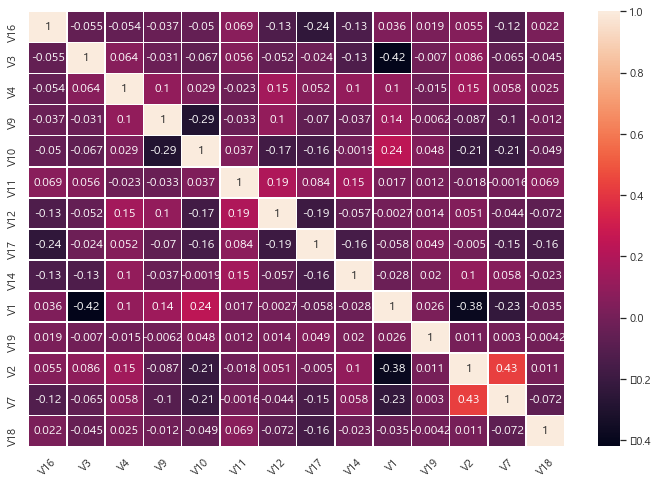

In [38]:
X = X[feature_select.index]
corr_matrix = X.corr(method = "spearman")
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(data = corr_matrix, annot = True, linewidths=.5, ax=ax)
plt.xticks(rotation=45)

# VIF(variance_inflation_factor)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif.head()

,VIF Factor,features
0,1.000654,V18
1,1.000744,V19
2,1.001062,V4
3,1.001062,V9
4,1.001118,V11


In [40]:
vif

,VIF Factor,features
0,1.000654,V18
1,1.000744,V19
2,1.001062,V4
3,1.001062,V9
4,1.001118,V11
5,1.001142,V14
6,1.001159,V12
7,1.001580,V16
8,1.002434,V10
9,1.002660,V17


# END